# Analysis of POIS-PE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

plt.close('all')

delta = 0.2

def read_data(path):
    df = pd.read_csv(path + 'progress.csv')
    iterations = len(df)
    batch_size = df['BatchSize']
    theta = []
    for i in range(8):
        theta.append([])
    for i in range(iterations):
        policy_params = np.load(path + 'weights_' + str(i) + '.npy')
        #iws = np.load(path + 'iws_' + str(i) + '.npy')
        for i in range(8):
            theta[i].append(policy_params[i])
    for i in range(8):
        df['theta%i' % (i+1)] = theta[i]
    df['CumAvgRew'] = np.cumsum(df['AvgRet'])/iterations
    return df

def plot_data(dfs, columns, bottom=-np.infty, top=np.infty, rng=None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    if type(dfs) is not list:
        dfs = [dfs]
    n_subplots = len(dfs)
    for i in range(n_subplots): 
        df = dfs[i]
        if rng is not None:
            df = df[rng]
        ax.set_xlabel('Iteration')
        x = range(len(df))
        for col in columns:
            y = np.clip(df[col], bottom, top)
            ax.plot(x, y, label=col)
        ax.legend()
    return fig

def plot_ci(mean, std, conf, n_runs):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(mean.index, mean)
    interval = sts.t.interval(conf, n_runs-1,loc=mean,scale=std/np.sqrt(n_runs))
    ax.fill_between(mean.index, interval[0], interval[1], alpha=0.3)
    return fig

# Cartpole

## Setting:
* Policy: determinisitc linear w/o bias
* Available random seeds: 107, 583, 850, 730, 808
* Batch size: 100
* Task variant: gym
* Horizon: 200

### Performance (undiscounted) on 5 different random seeds

**Available data**

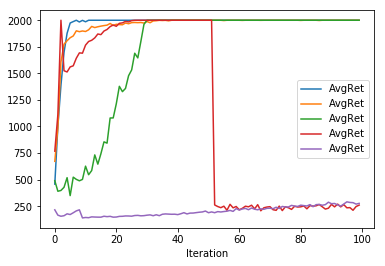

In [2]:
common_path = '../results/pgpepois/nc/cartpole/seed_'
seeds = [107, 583, 850, 730, 808]

dfs = []
for s in seeds:
    dfs.append(read_data(common_path + str(s) + '/'))
plot_data(dfs, ['AvgRet'])

In [3]:
n_iter = min(len(df) for df in dfs)
n_runs = len(dfs)
print('Number of runs:', n_runs)
print('Number of iterations per run:', n_iter)

Number of runs: 5
Number of iterations per run: 100


In [4]:
print('Columns:', list(dfs[0]))

Columns: ['AvgEpLen', 'Bound', 'MaxVanillaIw', 'AvgVanillaIw', 'VarVanillaIw', 'MinNormIw', 'MinVanillaIw', 'J', 'VarJ', 'AvgNormIw', 'AvgDiscRet', 'AvgRet', 'MaxNormIw', 'VarDiscRet', 'ESSRenyi', 'ESSClassic', 'eRenyi2', 'BatchSize', 'VarRet', 'VarNormIw', 'theta1', 'theta2', 'theta3', 'theta4', 'theta5', 'theta6', 'theta7', 'theta8', 'CumAvgRew']


In [5]:
concat_df = pd.concat(dfs, axis=1)
mean_df = pd.concat(dfs, axis=1).groupby(by=concat_df.columns, axis=1).mean()
std_df = pd.concat(dfs, axis=1).groupby(by=concat_df.columns, axis=1).std()

Average performance with 95% confidence intervals:


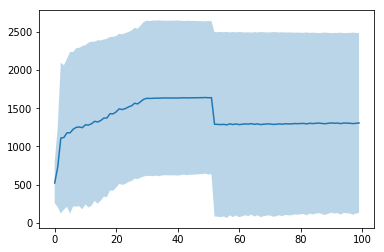

In [6]:
conf = 0.95
print('Average performance with %i%% confidence intervals:' % (conf*100))
mean = mean_df['AvgRet']
std = std_df['AvgRet']
plot_ci(mean, std, conf, n_runs)

In [7]:
cum_mean = mean_df['CumAvgRew'][len(mean_df)-1]
cum_std = std_df['CumAvgRew'][len(mean_df)-1]
interval = sts.t.interval(conf, n_runs-1,loc=cum_mean,scale=cum_std/np.sqrt(n_runs))
print('Average cumulative reward: %f, c.i. %s' % (cum_mean, interval))

Average cumulative reward: 1377.727782, c.i. (452.2447407788742, 2303.2108233164035)


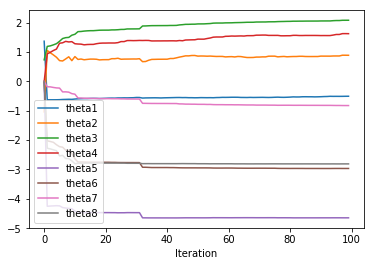

In [8]:
args = ['theta%i'%(i+1) for i in range(8)]
plot_data(dfs[0], args)

# POIS-NPE

# Cartpole

## Setting:
* Policy: determinisitc linear w/o bias
* Available random seeds: 107, 583, 850, 730, 808
* Batch size: 100
* Task variant: gym
* Horizon: 200

### Performance (undiscounted) on 5 different random seeds

**Available data**

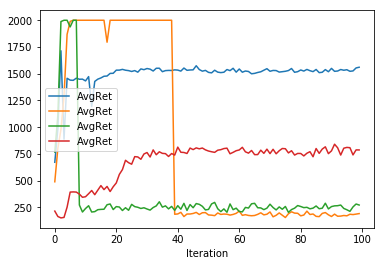

In [12]:
common_path = '../results/npgpepois/nc/cartpole/seed_'
seeds = [583, 850, 730, 808]

dfs = []
for s in seeds:
    dfs.append(read_data(common_path + str(s) + '/'))
plot_data(dfs, ['AvgRet'])

In [13]:
n_iter = min(len(df) for df in dfs)
n_runs = len(dfs)
print('Number of runs:', n_runs)
print('Number of iterations per run:', n_iter)

Number of runs: 4
Number of iterations per run: 100


In [14]:
print('Columns:', list(dfs[0]))

Columns: ['MaxNormIw', 'MaxVanillaIw', 'AvgVanillaIw', 'VarNormIw', 'J', 'VarJ', 'ESSRenyi', 'VarVanillaIw', 'eRenyi2', 'VarRet', 'AvgRet', 'MinNormIw', 'ESSClassic', 'AvgDiscRet', 'AvgNormIw', 'AvgEpLen', 'Bound', 'MinVanillaIw', 'VarDiscRet', 'BatchSize', 'theta1', 'theta2', 'theta3', 'theta4', 'theta5', 'theta6', 'theta7', 'theta8', 'CumAvgRew']


In [15]:
concat_df = pd.concat(dfs, axis=1)
mean_df = pd.concat(dfs, axis=1).groupby(by=concat_df.columns, axis=1).mean()
std_df = pd.concat(dfs, axis=1).groupby(by=concat_df.columns, axis=1).std()

Average performance with 95% confidence intervals:


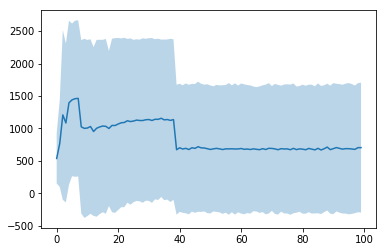

In [16]:
conf = 0.95
print('Average performance with %i%% confidence intervals:' % (conf*100))
mean = mean_df['AvgRet']
std = std_df['AvgRet']
plot_ci(mean, std, conf, n_runs)

In [17]:
cum_mean = mean_df['CumAvgRew'][len(mean_df)-1]
cum_std = std_df['CumAvgRew'][len(mean_df)-1]
interval = sts.t.interval(conf, n_runs-1,loc=cum_mean,scale=cum_std/np.sqrt(n_runs))
print('Average cumulative reward: %f, c.i. %s' % (cum_mean, interval))

Average cumulative reward: 846.462969, c.i. (87.3033451405297, 1605.622593720904)


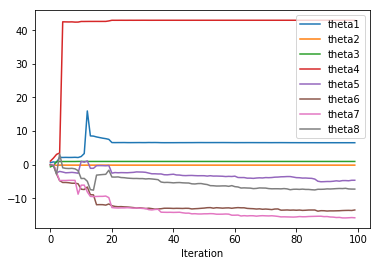

In [18]:
args = ['theta%i'%(i+1) for i in range(8)]
plot_data(dfs[0], args)

In [19]:
dfs[2]['eRenyi2']

0          2.106670
1      21694.803000
2      28543.291000
3          0.000017
4          0.044927
5     110065.130000
6          0.014831
7               NaN
8               NaN
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              NaN
23              NaN
24              NaN
25              NaN
26              NaN
27              NaN
28              NaN
29              NaN
          ...      
70              NaN
71              NaN
72              NaN
73              NaN
74              NaN
75              NaN
76              NaN
77              NaN
78              NaN
79              NaN
80              NaN
81              NaN
82              NaN
83              NaN
84              NaN
85              NaN
86              NaN
87              NaN
88              NaN
